In [1]:
import pandas as pd

file_path = 'healthcare-dataset-stroke-data.csv'
data=pd.read_csv(file_path)

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
missing_values = data.isnull().sum()


In [6]:
numerical_stats = data.describe()
categorical_stats = data.describe(include=['object'])

In [7]:
stroke_distribution = data['stroke'].value_counts(normalize=True)

missing_values, numerical_stats, categorical_stats, stroke_distribution

(id                     0
 gender                 0
 age                    0
 hypertension           0
 heart_disease          0
 ever_married           0
 work_type              0
 Residence_type         0
 avg_glucose_level      0
 bmi                  201
 smoking_status         0
 stroke                 0
 dtype: int64,
                  id          age  hypertension  heart_disease  \
 count   5110.000000  5110.000000   5110.000000    5110.000000   
 mean   36517.829354    43.226614      0.097456       0.054012   
 std    21161.721625    22.612647      0.296607       0.226063   
 min       67.000000     0.080000      0.000000       0.000000   
 25%    17741.250000    25.000000      0.000000       0.000000   
 50%    36932.000000    45.000000      0.000000       0.000000   
 75%    54682.000000    61.000000      0.000000       0.000000   
 max    72940.000000    82.000000      1.000000       1.000000   
 
        avg_glucose_level          bmi       stroke  
 count        5110.0000

In [8]:
#handling missing vals
imp = SimpleImputer(strategy='median')
data['bmi'] = imp.fit_transform(data[['bmi']])

In [9]:
#encode categorical var
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {}

In [10]:
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [11]:
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB


(None,
       id  gender   age  hypertension  heart_disease  ever_married  work_type  \
 0   9046       1  67.0             0              1             1          2   
 1  51676       0  61.0             0              0             1          3   
 2  31112       1  80.0             0              1             1          2   
 3  60182       0  49.0             0              0             1          2   
 4   1665       0  79.0             1              0             1          3   
 
    Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
 0               1             228.69  36.6               1       1  
 1               0             202.21  28.1               2       1  
 2               0             105.92  32.5               2       1  
 3               1             171.23  34.4               3       1  
 4               0             174.12  24.0               2       1  )

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
numerical_col = ['age', 'avg_glucose_level', 'bmi']
data[numerical_col] = scaler.fit_transform(data[numerical_col])

In [14]:
from imblearn.over_sampling import SMOTE

X = data.drop(columns=['stroke', 'id'])
y = data['stroke']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

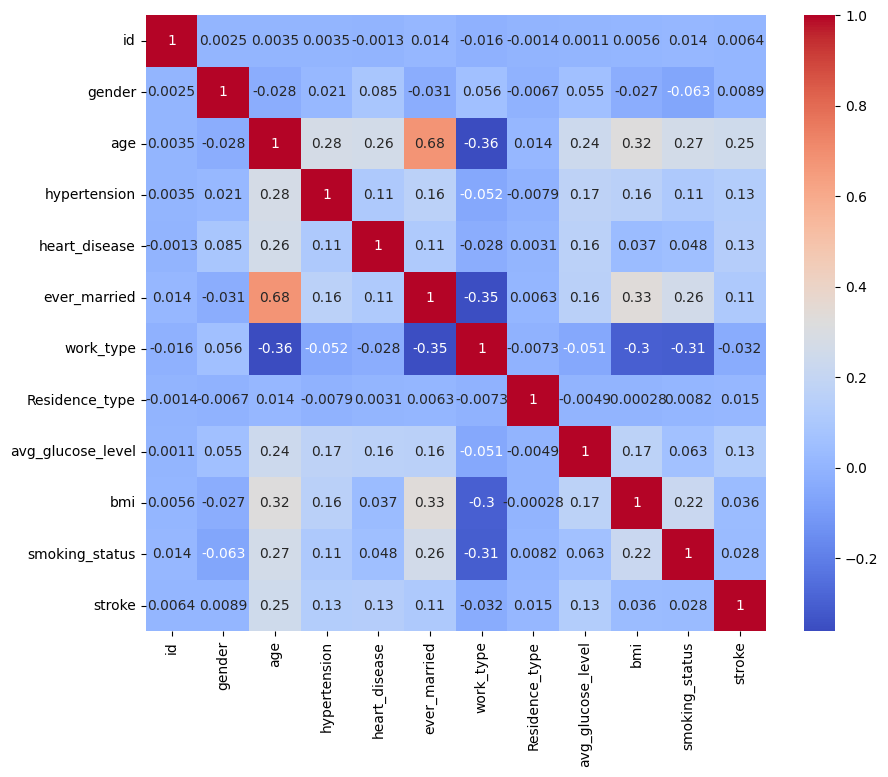

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


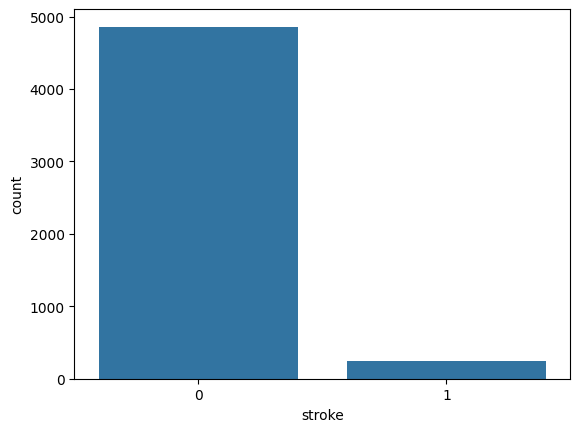

In [16]:
sns.countplot(x='stroke', data=data)
plt.show()


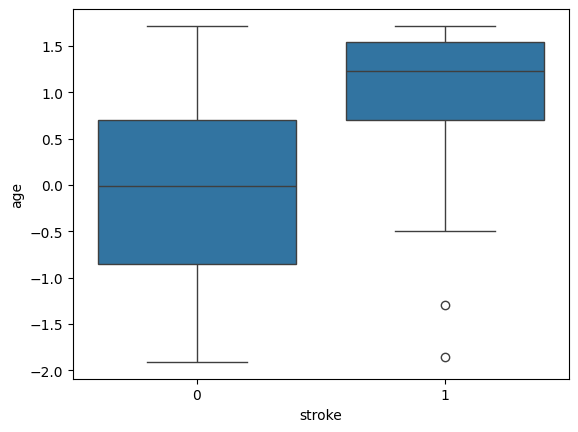

In [17]:
sns.boxplot(x='stroke', y='age', data=data)
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


[[728 247]
 [180 790]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       975
           1       0.76      0.81      0.79       970

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945

ROC-AUC Score: 0.8591403647898493


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 10, 'n_estimators': 100}


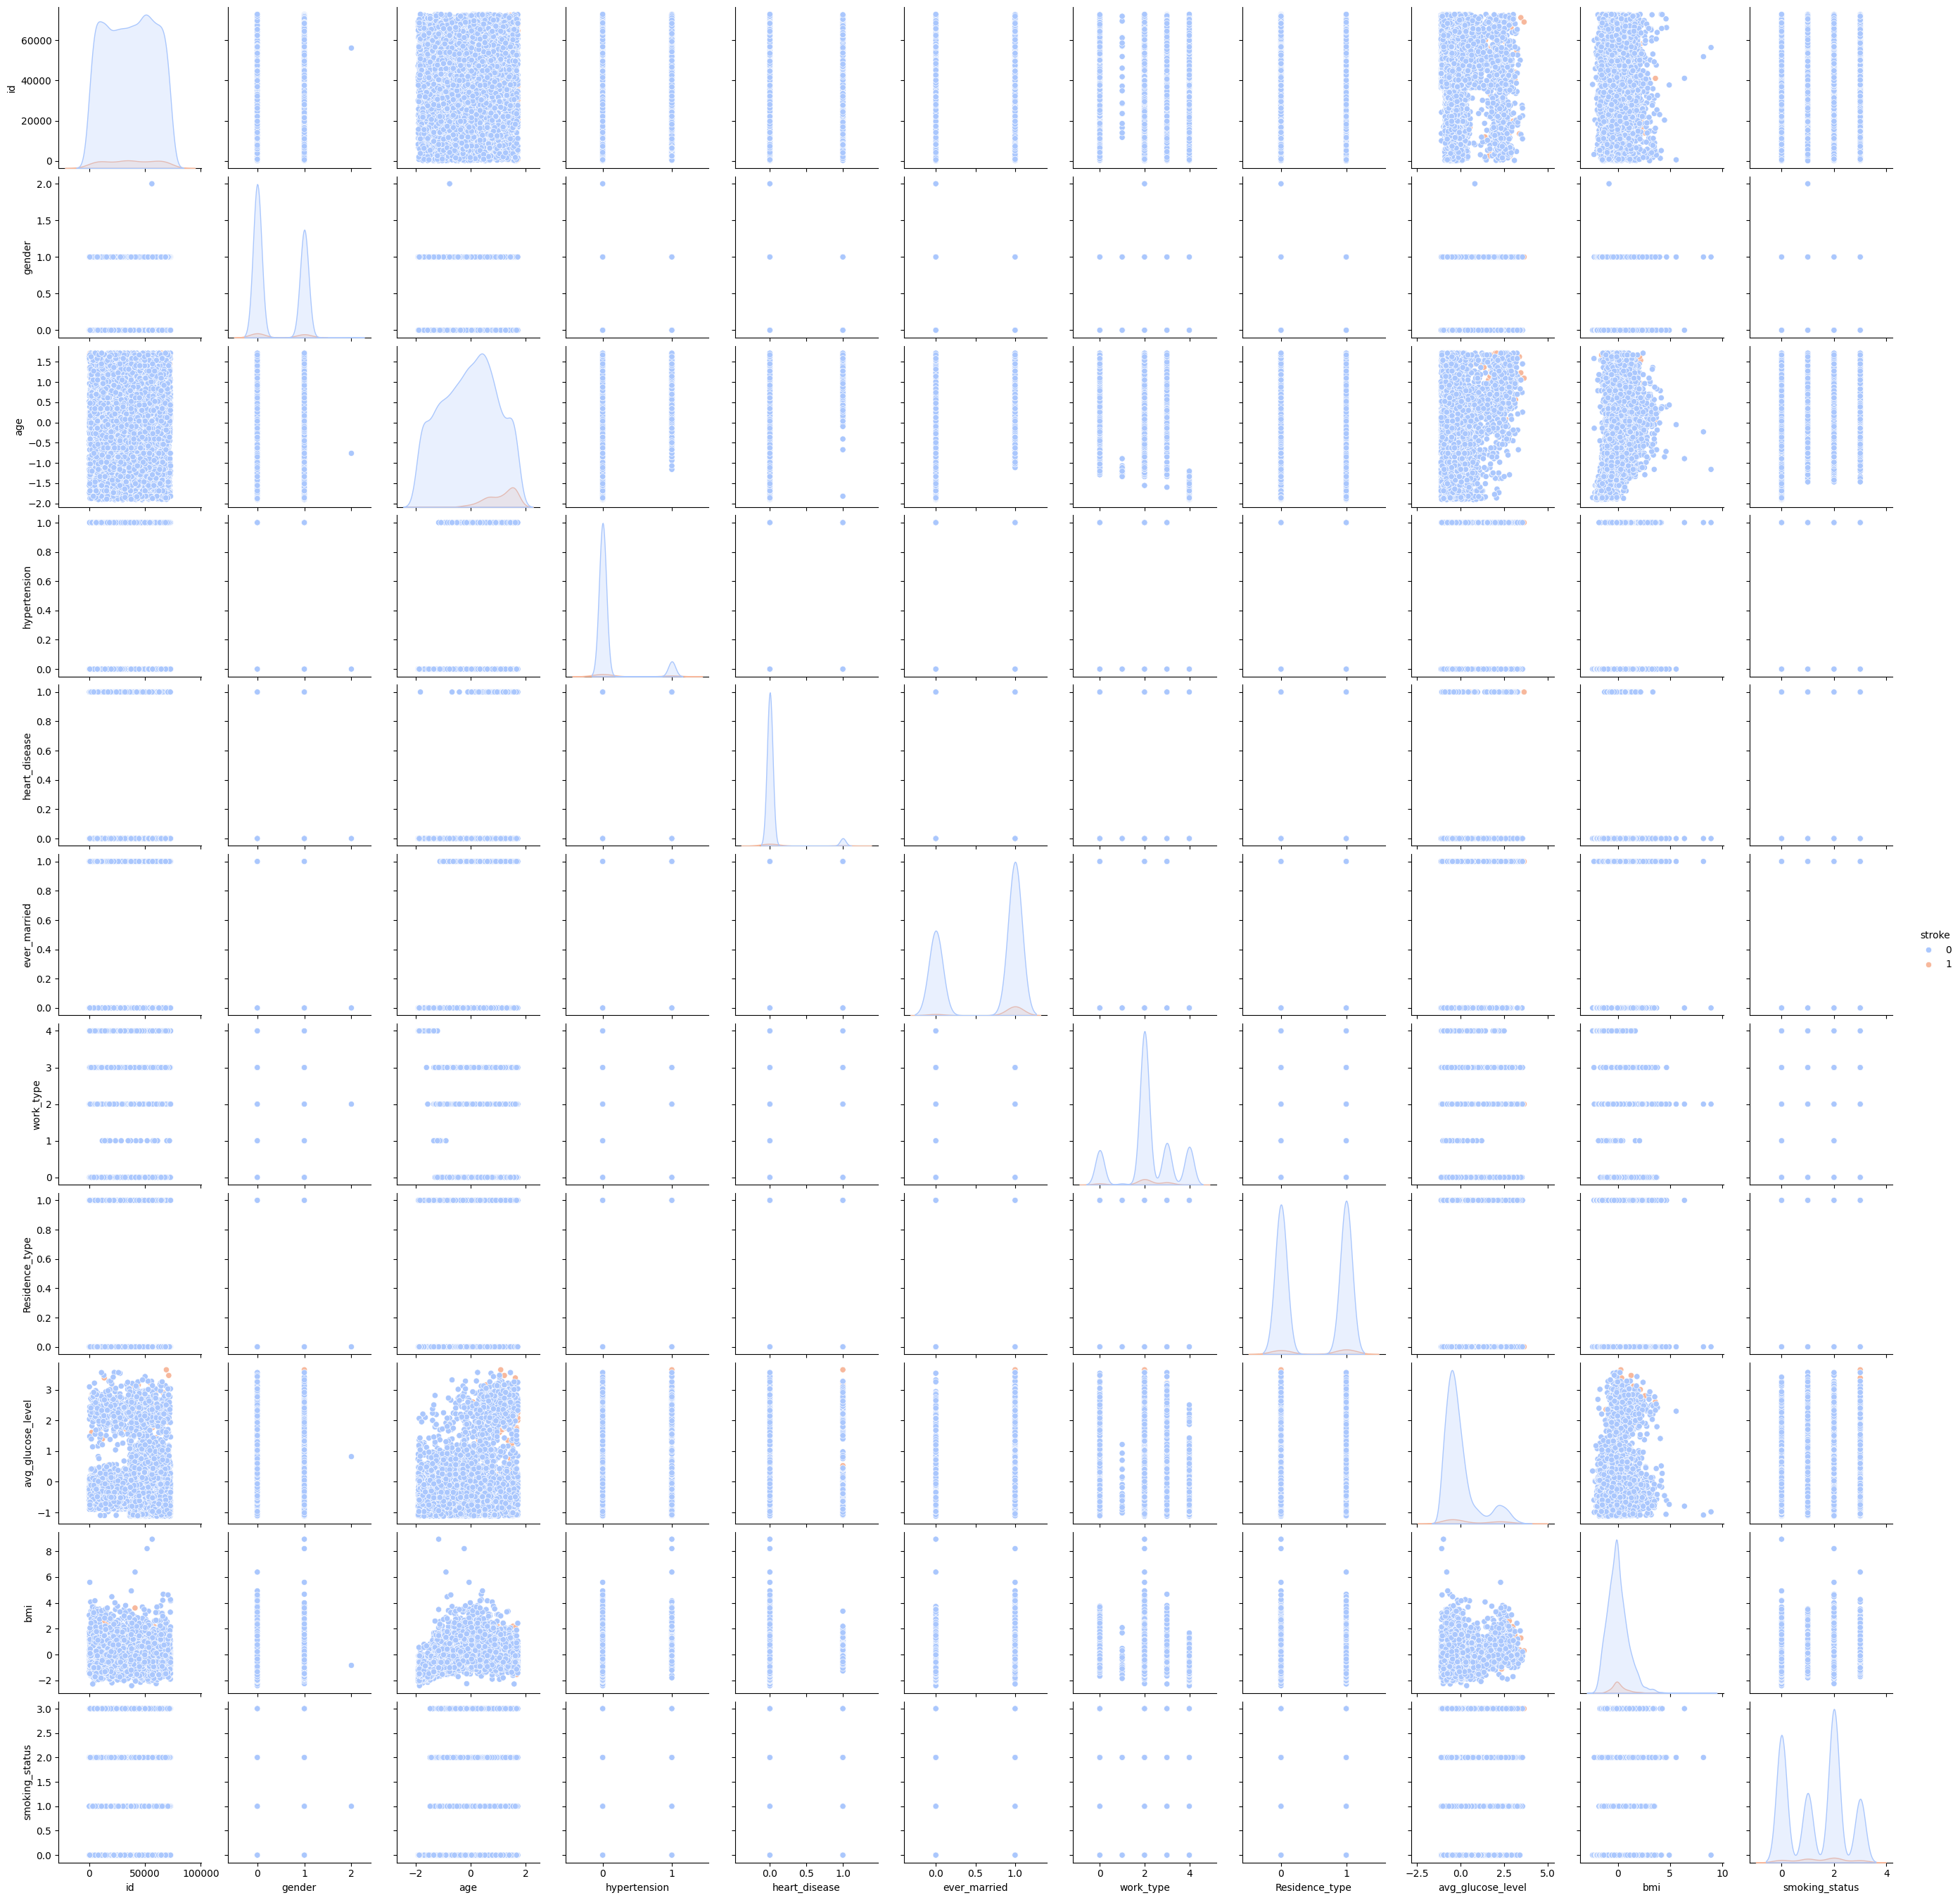

In [23]:
import seaborn as sns

sns.pairplot(data, hue='stroke', diag_kind='kde', palette='coolwarm')


In [24]:
data.groupby('stroke')[['age', 'bmi', 'avg_glucose_level']].mean()


,age,bmi,avg_glucose_level
stroke,,,
0,-0.055508,-0.008173,-0.029863
1,1.083640,0.159548,0.582985


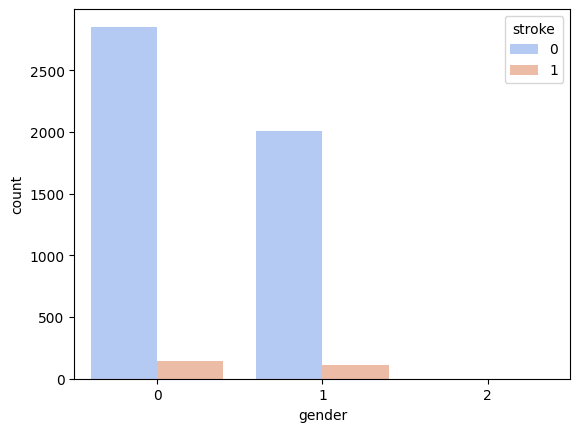

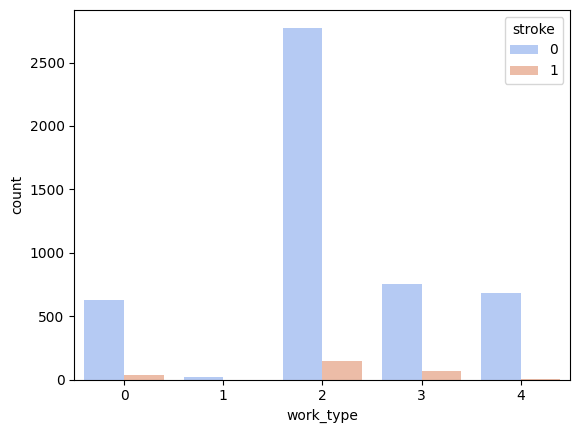

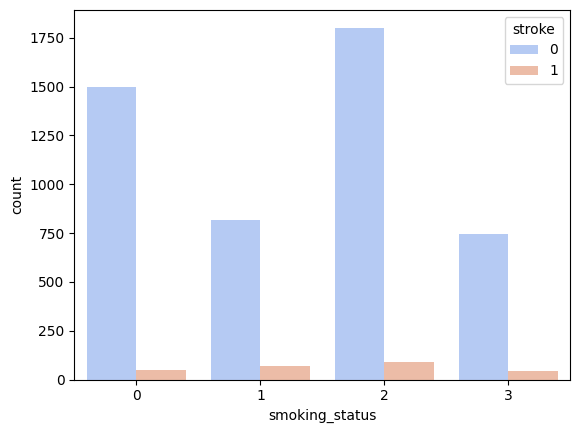

In [25]:
for col in ['gender', 'work_type', 'smoking_status']:
    sns.countplot(data=data, x=col, hue='stroke', palette='coolwarm')
    plt.show()


In [26]:
data['age_bmi_interaction'] = data['age'] * data['bmi']


In [27]:
bins = [0, 18, 40, 60, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)


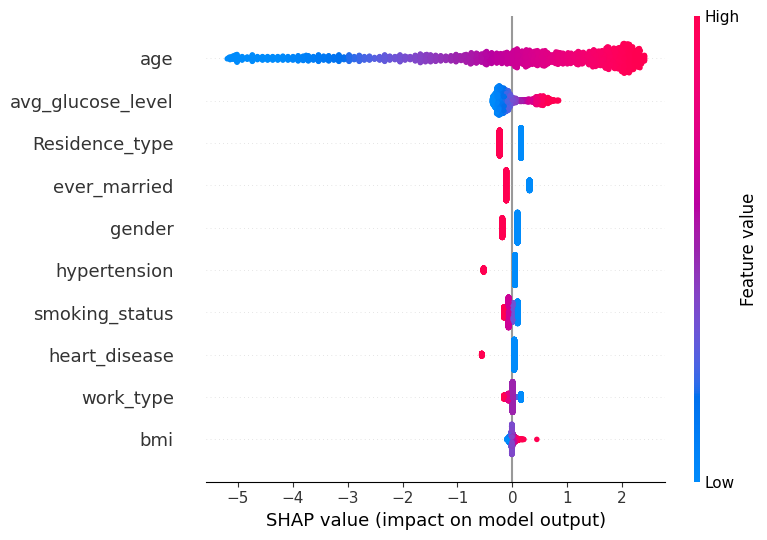

In [28]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


In [29]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.show()


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [('lr', LogisticRegression()), ('rf', RandomForestClassifier())]
stack_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())
stack_model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [31]:
import streamlit as st

st.title("Brain Stroke Prediction")
age = st.slider("Age", 0, 100)
bmi = st.slider("BMI", 10.0, 50.0)
glucose = st.slider("Glucose Level", 50, 200)

if st.button("Predict"):
    prediction = model.predict([[age, bmi, glucose]])
    st.write("Prediction:", "Stroke" if prediction[0] == 1 else "No Stroke")


In [32]:
import joblib

joblib.dump(model, 'stroke_prediction_model1.pkl')


['stroke_prediction_model1.pkl']